## Create ML model using XGBOOST algorithm for self-driving car with LIDAR data

In [1]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report
# from micromlgen import port

In [2]:
# read data from csv
data = pd.read_csv('../data/test4567.txt', header=None)

In [3]:
data.rename(columns={data.columns[-1]: 'Label'}, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Label
0,221,224,225,227,229,230,232,234,236,239,...,211,212,212,212,212,213,214,214,215,F
1,218,221,222,222,225,227,229,231,233,235,...,211,211,216,217,210,211,211,212,213,F
2,212,218,215,215,217,218,220,222,224,224,...,202,202,202,203,203,204,204,204,205,F
3,193,196,197,199,200,202,204,205,207,209,...,183,183,184,184,185,185,186,187,187,F
4,185,187,188,190,191,193,195,197,197,201,...,202,195,192,189,187,184,182,179,177,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18479,199,211,219,228,238,249,260,273,287,303,...,162,155,157,159,151,155,159,163,168,F
18480,165,166,167,168,169,170,171,172,173,175,...,166,155,157,159,151,155,159,163,168,G
18481,165,163,164,165,165,166,166,167,168,168,...,178,177,176,175,174,173,173,172,172,I
18482,182,183,184,185,186,187,188,189,190,191,...,180,179,179,179,179,179,179,179,179,F


In [4]:
# show the original data that will contain L, R, and H which are unwanted as we want the car is always drive forward
data['Label'].unique()

array(['F', 'I', 'G', 'R', 'L', 'H'], dtype=object)

In [5]:
data = data[(data['Label'] != 'L') & (data['Label'] != 'R') & (data['Label'] != 'H')]
data.reset_index(drop=True, inplace=True)
data

,0,1,2,3,4,5,6,7,8,9,...,231,232,233,234,235,236,237,238,239,Label
0,221,224,225,227,229,230,232,234,236,239,...,211,212,212,212,212,213,214,214,215,F
1,218,221,222,222,225,227,229,231,233,235,...,211,211,216,217,210,211,211,212,213,F
2,212,218,215,215,217,218,220,222,224,224,...,202,202,202,203,203,204,204,204,205,F
3,193,196,197,199,200,202,204,205,207,209,...,183,183,184,184,185,185,186,187,187,F
4,185,187,188,190,191,193,195,197,197,201,...,202,195,192,189,187,184,182,179,177,I
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18323,199,211,219,228,238,249,260,273,287,303,...,162,155,157,159,151,155,159,163,168,F
18324,165,166,167,168,169,170,171,172,173,175,...,166,155,157,159,151,155,159,163,168,G
18325,165,163,164,165,165,166,166,167,168,168,...,178,177,176,175,174,173,173,172,172,I
18326,182,183,184,185,186,187,188,189,190,191,...,180,179,179,179,179,179,179,179,179,F


In [6]:
X = data.iloc[:, :-1]
X

,0,1,2,3,4,5,6,7,8,9,...,230,231,232,233,234,235,236,237,238,239
0,221,224,225,227,229,230,232,234,236,239,...,211,211,212,212,212,212,213,214,214,215
1,218,221,222,222,225,227,229,231,233,235,...,211,211,211,216,217,210,211,211,212,213
2,212,218,215,215,217,218,220,222,224,224,...,202,202,202,202,203,203,204,204,204,205
3,193,196,197,199,200,202,204,205,207,209,...,183,183,183,184,184,185,185,186,187,187
4,185,187,188,190,191,193,195,197,197,201,...,202,202,195,192,189,187,184,182,179,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18323,199,211,219,228,238,249,260,273,287,303,...,161,162,155,157,159,151,155,159,163,168
18324,165,166,167,168,169,170,171,172,173,175,...,161,166,155,157,159,151,155,159,163,168
18325,165,163,164,165,165,166,166,167,168,168,...,179,178,177,176,175,174,173,173,172,172
18326,182,183,184,185,186,187,188,189,190,191,...,180,180,179,179,179,179,179,179,179,179


In [7]:
# Assign target y as the last column 'Label'
y = data.iloc[:, -1]
label_encoder = LabelEncoder()
y = label_encoder.fit_transform(y)
y

array([0, 0, 0, ..., 2, 0, 0])

### Begin training

In [8]:
# Split the training data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [9]:
# Select 15 best features for training
k = 15
k_best = SelectKBest(score_func=f_classif, k=k)
k_best.fit(X_train, y_train)

selected_feature_indices = k_best.get_support(indices=True)
selected_feature_indices

array([147, 148, 149, 150, 151, 152, 206, 207, 208, 209, 210, 211, 212,
       213, 214], dtype=int64)

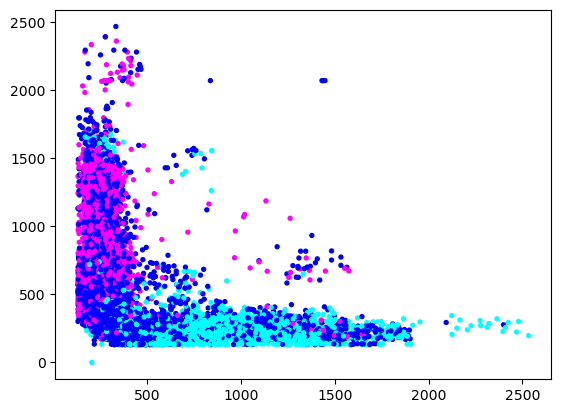

In [10]:
def letters_to_colors(letters):
    color_mapping = {
        'F': 'blue',
        'G': 'cyan',
        'I': 'magenta'
    }
    
    return [color_mapping.get(letter, 'black') for letter in letters]
    
plt.scatter(data.iloc[:, selected_feature_indices[0]], data.iloc[:, selected_feature_indices[9]], c = letters_to_colors(data.iloc[:, -1]), s=8)
plt.show()

In [11]:
xgb = XGBClassifier()
xgb.fit(X_train.iloc[:, selected_feature_indices], y_train)

C:\ProgramData\anaconda3\envs\tensor\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\ProgramData\anaconda3\envs\tensor\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\ProgramData\anaconda3\envs\tensor\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\ProgramData\anaconda3\envs\tensor\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [12]:
y_pred = xgb.predict(X_test.iloc[:, selected_feature_indices])

accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy score of the XGBoost classifier with Sklearn SelectKBest feature selection is {accuracy:.2f}.")

The accuracy score of the XGBoost classifier with Sklearn SelectKBest feature selection is 0.72.


C:\ProgramData\anaconda3\envs\tensor\lib\site-packages\xgboost\data.py:299: FutureWarning: is_sparse is deprecated and will be removed in a future version. Check `isinstance(dtype, pd.SparseDtype)` instead.
  if is_sparse(dtype):
C:\ProgramData\anaconda3\envs\tensor\lib\site-packages\xgboost\data.py:301: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  elif is_categorical_dtype(dtype) and enable_categorical:
C:\ProgramData\anaconda3\envs\tensor\lib\site-packages\xgboost\data.py:332: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if is_categorical_dtype(dtype)
C:\ProgramData\anaconda3\envs\tensor\lib\site-packages\xgboost\data.py:323: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  return is_int or is_bool or is_

## Use LDA to do feature selection

In [13]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

# Use LDA to select the top 2 features
lda = LinearDiscriminantAnalysis(n_components=2)
X_lda = lda.fit_transform(X_train, y_train)
X_lda

array([[-1.06508042,  0.22483837],
       [-2.59676163, -0.84923583],
       [-0.82298288,  0.36541362],
       ...,
       [-1.765632  , -0.55152852],
       [ 0.58872809,  0.29063897],
       [-0.47529387,  3.00343185]])

In [24]:
# Show data on Scatter plot
# plt.scatter(data.iloc[:, selected_feature_indices[0]], data.iloc[:, selected_feature_indices[9]], c = letters_to_colors(data.iloc[:, -1]), s=8)
# plt.show()

### Hyperparameter tunning

In [14]:
# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, 15],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.5, 0.7, 1.0],
    'colsample_bytree': [0.5, 0.7, 1.0]
}

In [15]:
# Create a XGBoost classifier
from sklearn.model_selection import GridSearchCV
xgb = XGBClassifier()

# Perform a grid search to find the best hyperparameters
grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5, verbose=3)
grid_search.fit(X_lda, y_train)

Fitting 5 folds for each of 243 candidates, totalling 1215 fits
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.722 total time=   0.9s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.729 total time=   0.8s
[CV 3/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.731 total time=   0.8s
[CV 4/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.725 total time=   0.9s
[CV 5/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.5;, score=0.731 total time=   0.8s
[CV 1/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7;, score=0.723 total time=   0.9s
[CV 2/5] END colsample_bytree=0.5, learning_rate=0.01, max_depth=5, n_estimators=100, subsample=0.7;, score=0.728 total time=   0.9s
[CV 3

GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight=None,
                                     missing=nan, monotone_constraints=None,
                                     n_estimators=100, n_jobs=None,
                                     num_parallel_tree=None, predictor=None,
                                     random_state=None, ...),
             param_grid={'colsample_bytree': [0.5, 0.7, 1.0],
                         'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [5, 10, 15],
                         'n_estimators': [100, 200, 300],
                         'subsample': [0.5, 0.7, 1.0]},
             verbose=3)

In [16]:
# Print the best hyperparameters
print(f"The best hyperparameters are: {grid_search.best_params_}")

The best hyperparameters are: {'colsample_bytree': 1.0, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 100, 'subsample': 0.5}


In [17]:
# Use Random Forest to classify the data
# xgb_lda = XGBClassifier()
# xgb_lda.fit(X_lda, y_train)

# Use the best hyperparameters to fit the model
xgb_best = XGBClassifier(**grid_search.best_params_)
xgb_best.fit(X_lda, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=1.0, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=5, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              objective='multi:softprob', predictor=None, ...)

In [19]:
# Use the model to make predictions on the test set
X_test_lda = lda.transform(X_test)
y_pred = xgb_best.predict(X_test_lda)

In [20]:
# Calculate the accuracy score
accuracy = accuracy_score(y_test, y_pred)
print(f"The accuracy score of the XGBoost classifier with LDA feature selection is {accuracy:.2f}.")

The accuracy score of the XGBoost classifier with LDA feature selection is 0.72.


In [21]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[2050,  165,  103],
       [ 401,  360,    6],
       [ 341,    5,  235]], dtype=int64)

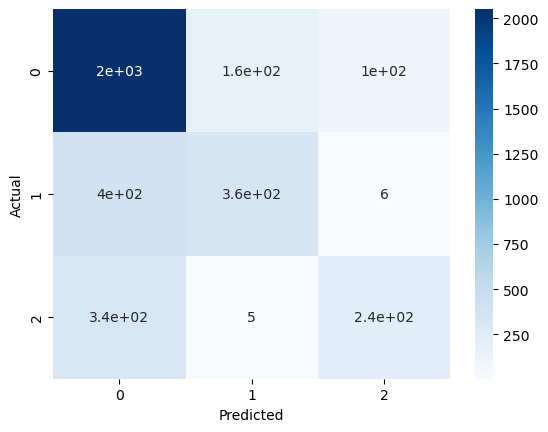

In [22]:
import seaborn as sns
# Plot the confusion matrix
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()